<a href="https://colab.research.google.com/github/ChiragShetye/Business-Case-Yulu/blob/main/Business_Case_Study_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy.stats import norm,zscore,boxcox,probplot
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind,ttest_rel,ttest_1samp,mannwhitneyu
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,kruskal,shapiro,levene,kstest
from scipy.stats import pearsonr,spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

df_raw = pd.read_csv(url)
print(df_raw.shape)
df_raw.head()
df_raw.rename(columns={'count':'total_rides'},inplace=True)
df_raw.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     10886 non-null  object 
 1   season       10886 non-null  int64  
 2   holiday      10886 non-null  int64  
 3   workingday   10886 non-null  int64  
 4   weather      10886 non-null  int64  
 5   temp         10886 non-null  float64
 6   atemp        10886 non-null  float64
 7   humidity     10886 non-null  int64  
 8   windspeed    10886 non-null  float64
 9   casual       10886 non-null  int64  
 10  registered   10886 non-null  int64  
 11  total_rides  10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df_raw.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Converting Necessary Columns
df_raw['datetime'] = pd.to_datetime(df_raw['datetime'])
catagorical_columns = ['season', 'holiday', 'workingday', 'weather']
for col in catagorical_columns:
    df_raw[col] = df_raw[col].astype('object')

In [ ]:
# Checking data after converting
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  object        
 2   holiday      10886 non-null  object        
 3   workingday   10886 non-null  object        
 4   weather      10886 non-null  object        
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  total_rides  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
# Checking null values in the data
df_raw.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


There are no null values in the dataset

In [ ]:
min_date = df_raw['datetime'].min()
max_date = df_raw['datetime'].max()
print(f"The earliest datetime in the dataset is: {min_date}")
print(f"The latest datetime in the dataset is: {max_date}")

The earliest datetime in the dataset is: 2011-01-01 00:00:00
The latest datetime in the dataset is: 2012-12-19 23:00:00


Looking at this we can conclude that data is from January 1st 2011 - December 19th 2012

In [ ]:
# Iterate through each categorical column and display the counts
for col in catagorical_columns:
    print(f"\nColumn: {col}")
    print(df_raw[col].value_counts())
    print("-" * 30)


Column: season
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
------------------------------

Column: holiday
holiday
0    10575
1      311
Name: count, dtype: int64
------------------------------

Column: workingday
workingday
1    7412
0    3474
Name: count, dtype: int64
------------------------------

Column: weather
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
------------------------------


### Feature Engineering

In [ ]:
df_raw['year'] = df_raw['datetime'].dt.year
df_raw['month'] = df_raw['datetime'].dt.month
df_raw['day'] = df_raw['datetime'].dt.day
df_raw['hour'] = df_raw['datetime'].dt.hour
df_raw['month'] = df_raw['month'].replace({1: 'January',
                                    2: 'February',
                                    3: 'March',
                                    4: 'April',
                                    5: 'May',
                                    6: 'June',
                                    7: 'July',
                                    8: 'August',
                                    9: 'September',
                                    10: 'October',
                                    11: 'November',
                                    12: 'December'})
df_raw['day_of_week'] = df_raw['datetime'].dt.day_name()
df_raw['season_type'] = df_raw['season'].replace({1: 'Spring',
                                    2: 'Summer',
                                    3: 'Fall',
                                    4: 'Winter'})
df_raw['weather_type'] = df_raw['weather'].replace({1: 'Clear',
                                    2: 'Mist',
                                    3: 'Light Snow',
                                    4: 'Heavy Rain'})
df_raw.rename(columns={'casual':'casual_uesrs'},inplace=True)
df_raw.rename(columns={'registered':'registerd_users'},inplace=True)

In [ ]:
df_raw

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides,year,month,day,hour,day_of_week,season_type,weather_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,0,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,1,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,2,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,3,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,4,Saturday,Spring,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,19,Wednesday,Winter,Clear
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,20,Wednesday,Winter,Clear
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,21,Wednesday,Winter,Clear
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,22,Wednesday,Winter,Clear


In [ ]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,10886,NaN,NaN,NaN,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,4.0,4.0,2734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,10886.0,2.0,0.0,10575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,10886.0,2.0,1.0,7412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,10886.0,4.0,1.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,10886.0,NaN,NaN,NaN,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,NaN,NaN,NaN,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,NaN,NaN,NaN,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,NaN,NaN,NaN,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual_uesrs,10886.0,NaN,NaN,NaN,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [ ]:
# Check for duplicates
duplicates = df_raw.duplicated()
print(df_raw[duplicates])

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual_uesrs, registerd_users, total_rides, year, month, day, hour, day_of_week, season_type, weather_type]
Index: []


In [ ]:
df_raw.duplicated().sum()

0

In [ ]:
df_raw.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual_uesrs,0




###Univariant & Bivariant Anyalisis

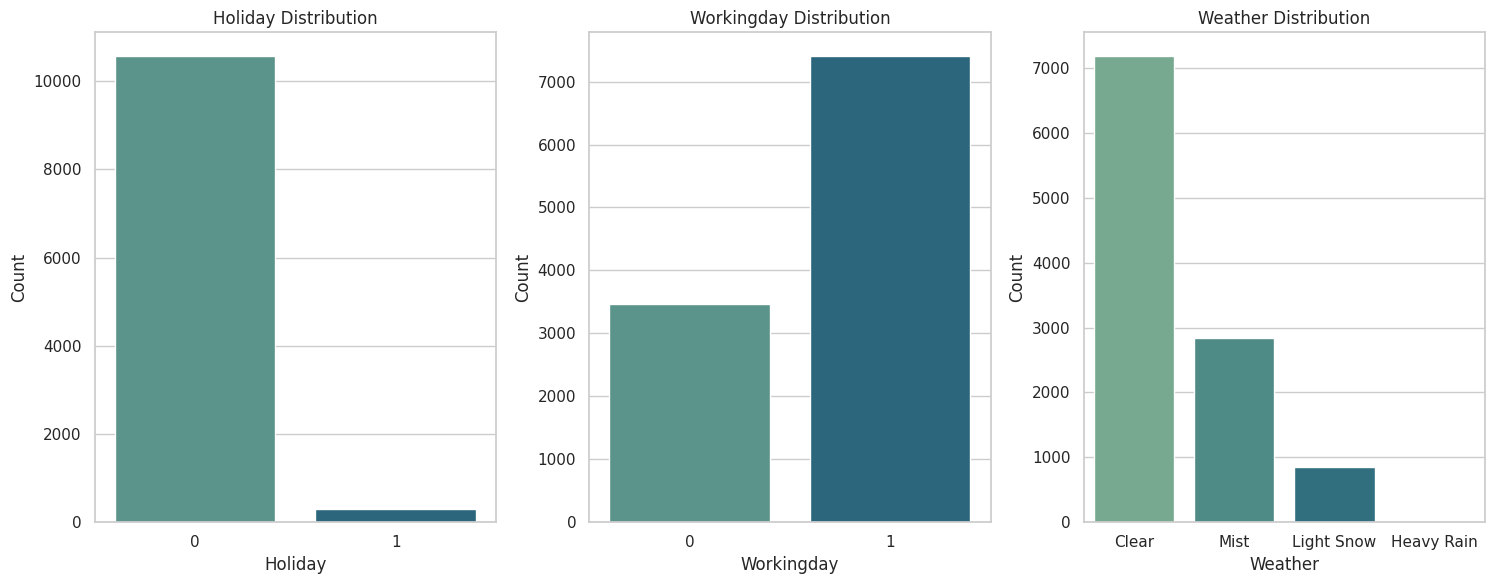

In [ ]:

plt.figure(figsize=(25, 6))
sns.set(style="whitegrid")

# Count Plot for 'holiday'
plt.subplot(1, 5, 1)
sns.countplot(data=df_raw, x='holiday', palette='crest')
plt.title('Holiday Distribution')
plt.xlabel('Holiday')
plt.ylabel('Count')

#Count Plot for 'workingday'
plt.subplot(1, 5, 2)
sns.countplot(data=df_raw, x='workingday', palette='crest')
plt.title('Workingday Distribution')
plt.xlabel('Workingday')
plt.ylabel('Count')

#Count Plot for 'weather_type'
plt.subplot(1, 5, 3)
sns.countplot(data=df_raw, x='weather_type', palette='crest')
plt.title('Weather Distribution')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

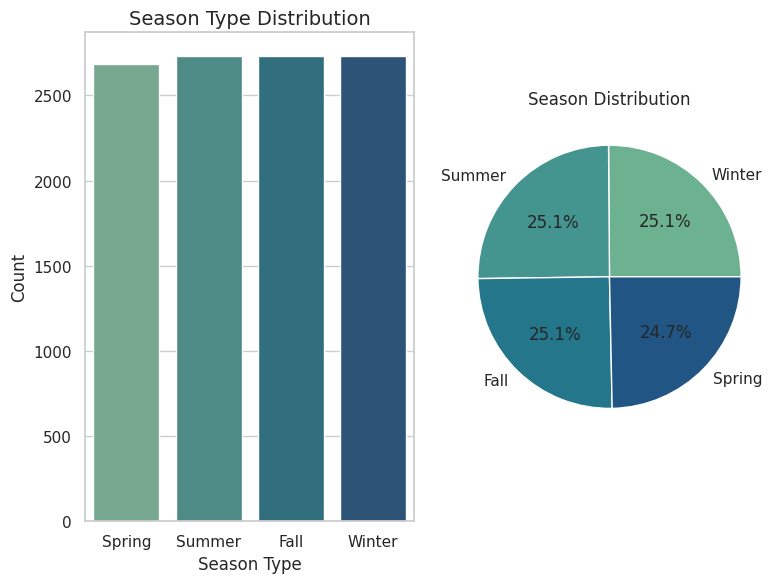

In [ ]:
plt.figure(figsize=(10, 6))

# Count Plot for 'season_type'
plt.subplot(1, 2, 1)
ax = sns.countplot(data=df_raw, x='season_type', palette='crest')
plt.title('Season Type Distribution', fontsize=14)
plt.xlabel('Season Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Pie Chart for 'seasons'
plt.subplot(1, 2, 2)
season_counts = df_raw['season_type'].value_counts()
season_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), colors=sns.color_palette("crest", len(season_counts)))
plt.title('Season Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

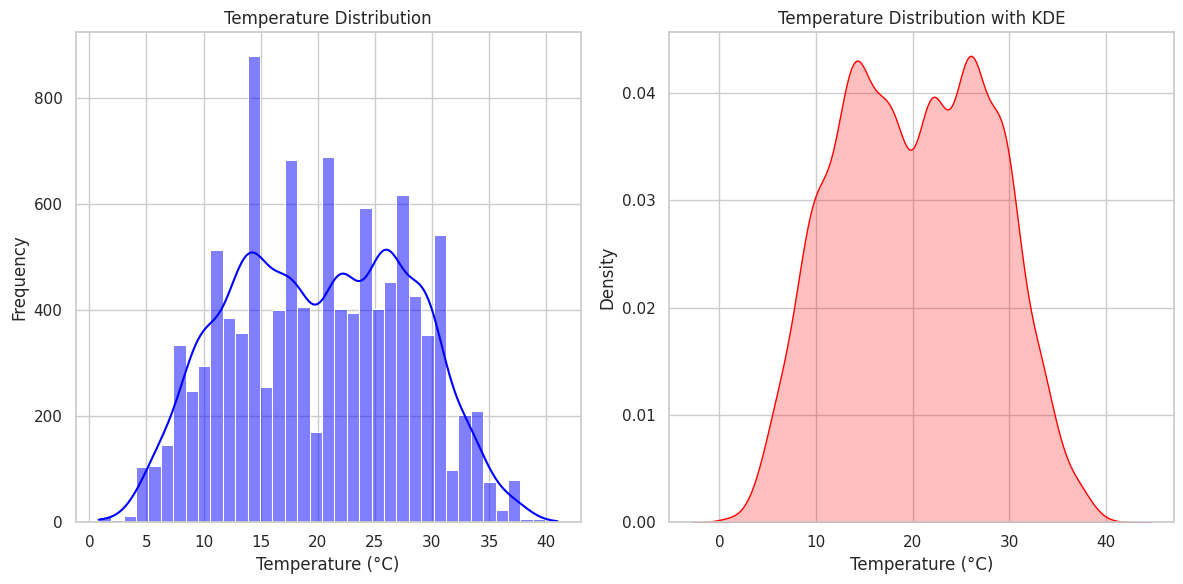

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for 'temp'
plt.subplot(1, 2, 1)
sns.histplot(data=df_raw, x='temp', kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# KDE Plot for 'temp'
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_raw, x='temp', fill=True, color='red')
plt.title('Temperature Distribution with KDE')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

## Bivariant Anyslisis

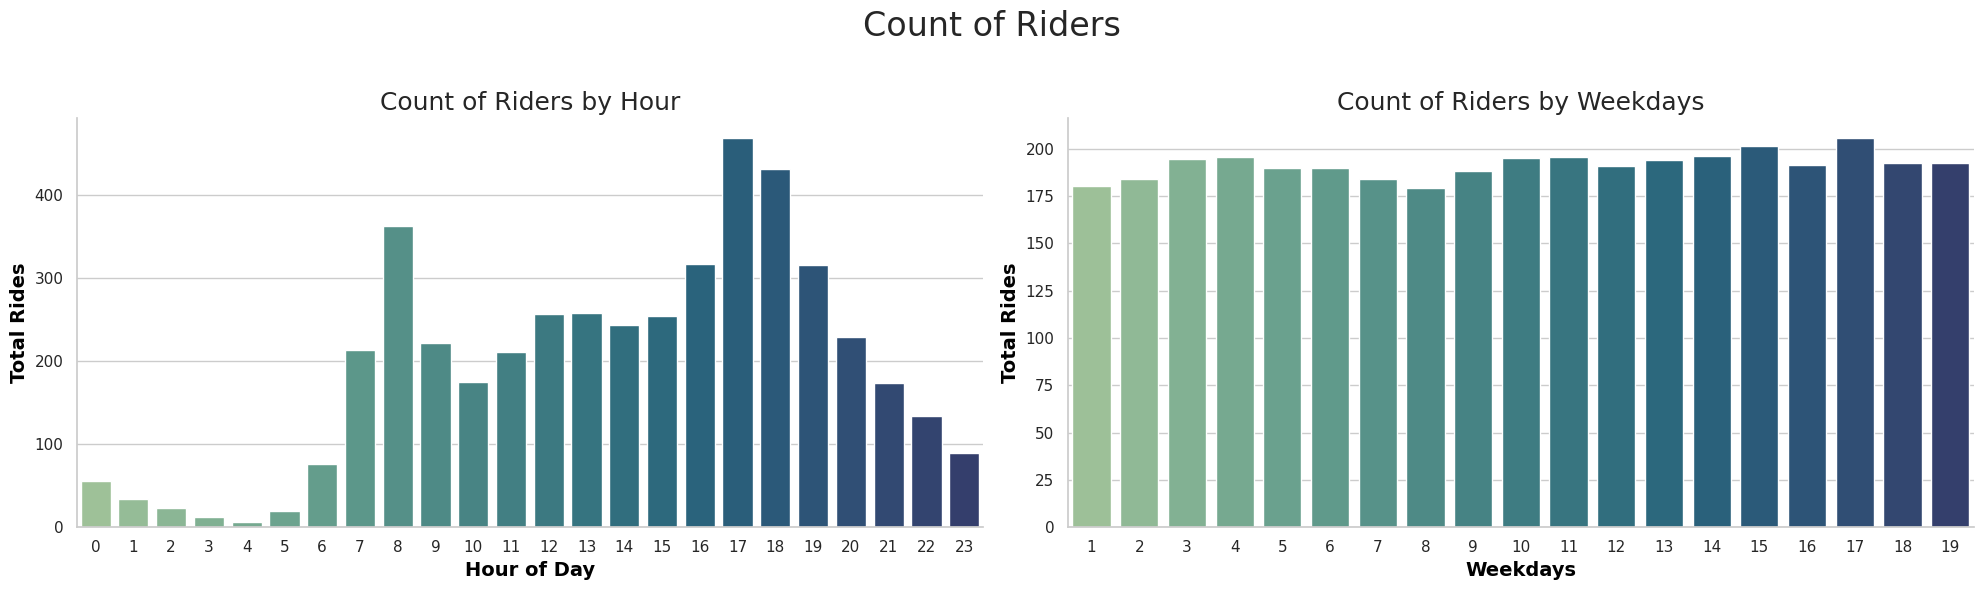

In [ ]:
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
plt.suptitle('Count of Riders', fontsize=24)

# Count of Riders by hour
plt.subplot(121)
b = sns.barplot(data=df_raw, x="hour", y="total_rides", palette='crest', ci=None)
b.bar_label(b.containers[0], fmt='%d', color='white', fontsize=12)
plt.title('Count of Riders by Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Rides', fontsize=14, fontweight='bold', color='black')

# Count of Riders by weekdays
plt.subplot(122)
b = sns.barplot(data=df_raw, x="day", y="total_rides", palette='crest', ci=None)
b.bar_label(b.containers[0], label_type='edge', fmt='%d', color='white', fontsize=12)
plt.title('Count of Riders by Weekdays', fontsize=18)
plt.xlabel('Weekdays', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Rides', fontsize=14, fontweight='bold', color='black')
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


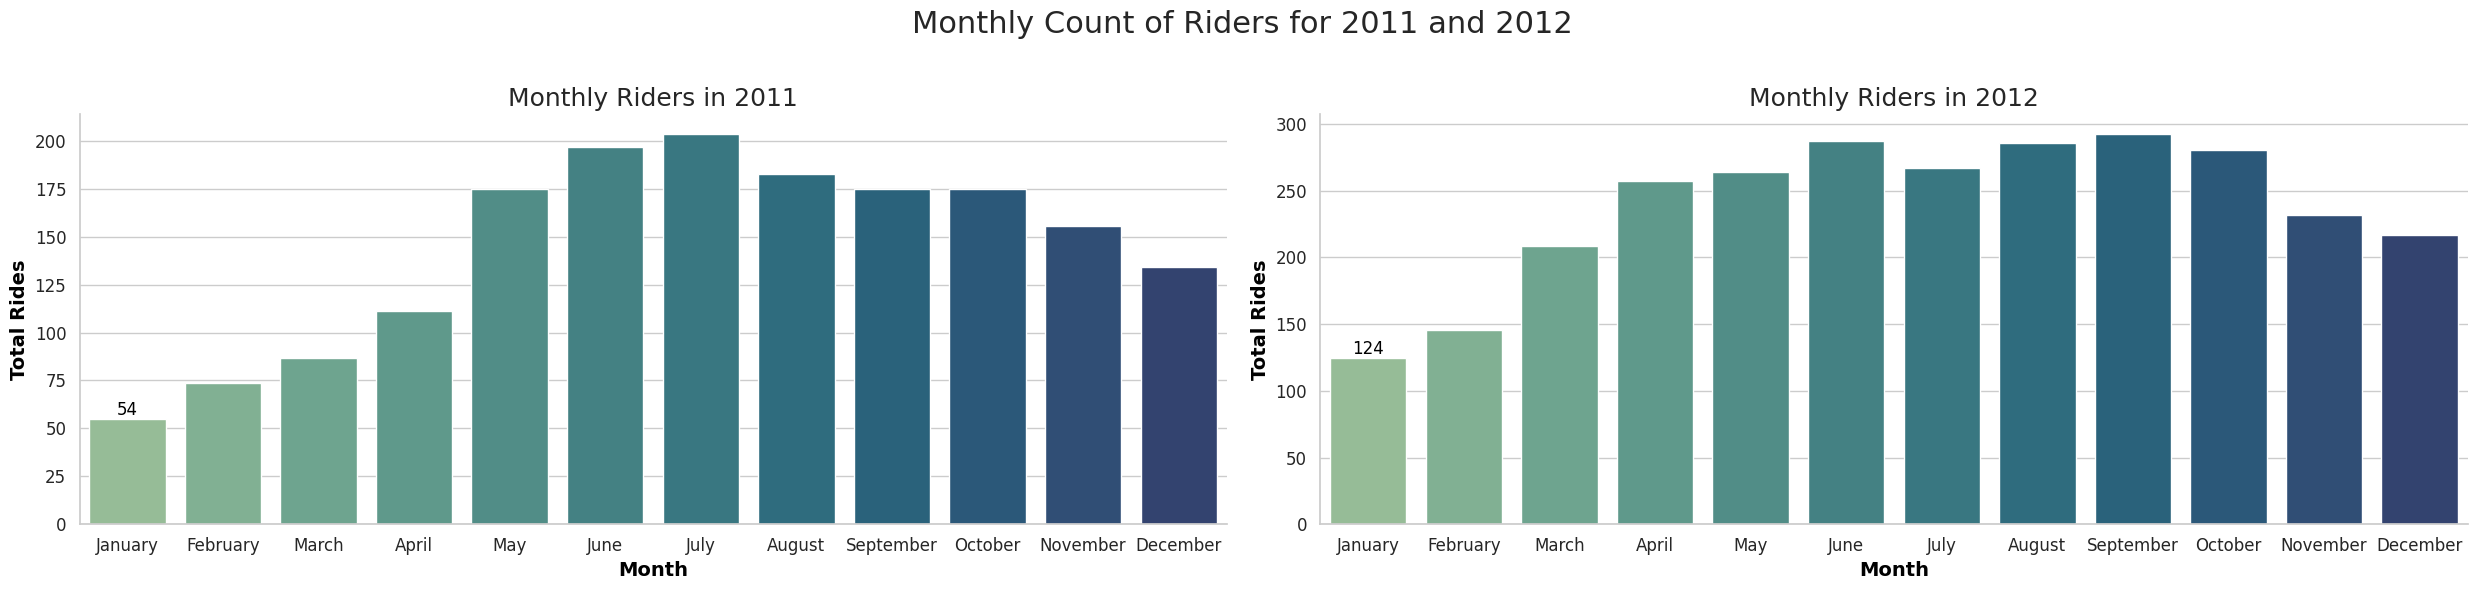

In [ ]:
plt.figure(figsize=(25, 6))
sns.set_style("whitegrid")
plt.suptitle('Monthly Count of Riders for 2011 and 2012', fontsize=22)

# Count of Riders by Month for 2011
plt.subplot(121)  # 1st subplot (1 row, 2 columns, 1st plot)
b = sns.barplot(data=df_raw[df_raw['year'] == 2011], x="month", y="total_rides", palette='crest', ci=None)
b.bar_label(b.containers[0], label_type='edge', fmt='%d', color='black', fontsize=12)
plt.title('Monthly Riders in 2011', fontsize=18)
plt.xlabel('Month', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Rides', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Count of Riders by Month for 2012
plt.subplot(122)  # 2nd subplot (1 row, 2 columns, 2nd plot)
b = sns.barplot(data=df_raw[df_raw['year'] == 2012], x="month", y="total_rides", palette='crest', ci=None)
b.bar_label(b.containers[0], label_type='edge', fmt='%d', color='black', fontsize=12)
plt.title('Monthly Riders in 2012', fontsize=18)
plt.xlabel('Month', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Rides', fontsize=14, fontweight='bold', color='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

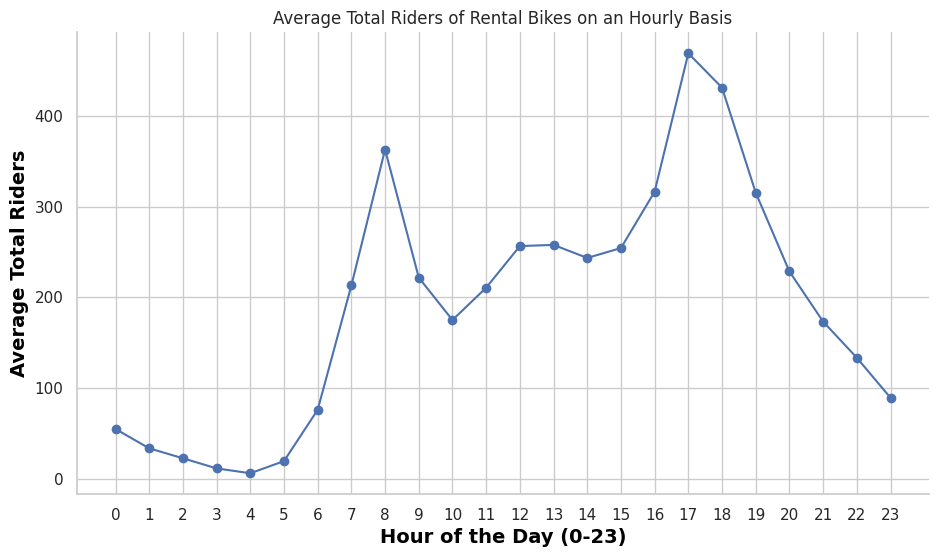

In [ ]:
hourly_avg = df_raw.groupby('hour')['total_rides'].mean().reset_index()
plt.figure(figsize=(11, 6))
plt.plot(hourly_avg['hour'], hourly_avg['total_rides'], marker='o')
plt.title("Average Total Riders of Rental Bikes on an Hourly Basis")
plt.xlabel("Hour of the Day (0-23)", fontsize=14, fontweight='bold', color='black')
plt.ylabel("Average Total Riders", fontsize=14, fontweight='bold', color='black')
plt.xticks(np.arange(0, 24, 1))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


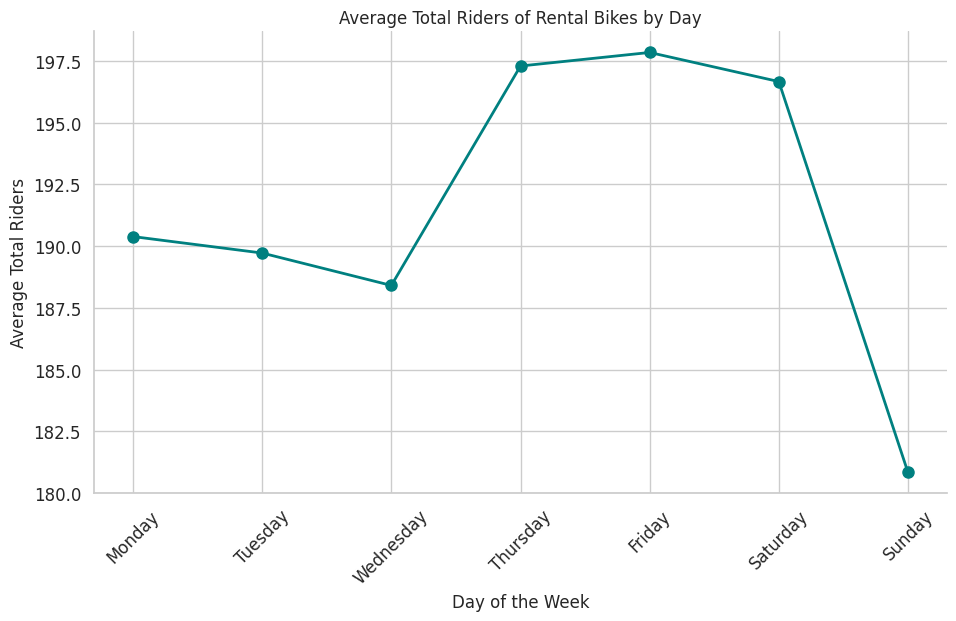

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_avg = df_raw.groupby('day_of_week')['total_rides'].mean().reset_index()
daily_avg['day_of_week'] = pd.Categorical(daily_avg['day_of_week'], categories=day_order, ordered=True)
daily_avg = daily_avg.sort_values('day_of_week')
plt.figure(figsize=(11, 6))
plt.plot(daily_avg['day_of_week'], daily_avg['total_rides'], marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)
plt.title("Average Total Riders of Rental Bikes by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Average Total Riders")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


In [ ]:
df_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides,year,month,day,hour,day_of_week,season_type,weather_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4,Saturday,Spring,Clear


In [ ]:
df_raw.drop(['datetime', 'month', 'day_of_week', 'season_type', 'weather_type'], axis=1).corr().style.background_gradient(cmap='coolwarm')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides,year,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,0.036157,0.146631
casual_uesrs,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.014109,0.302045
registerd_users,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.019111,0.380540


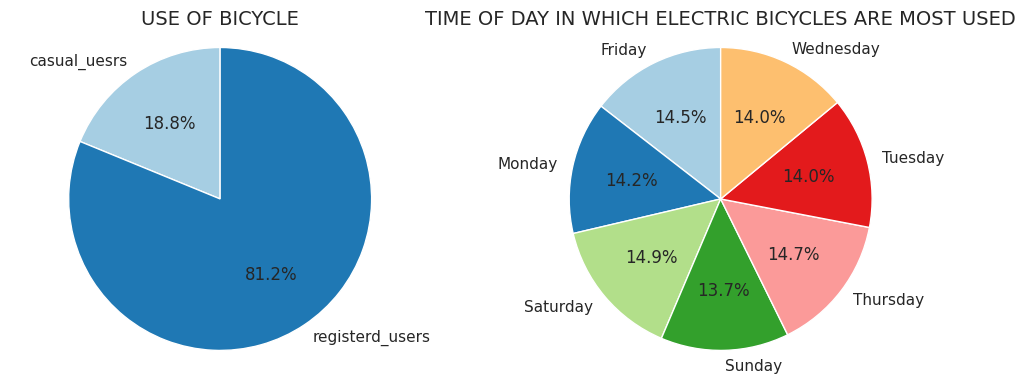

In [ ]:
casual_reg = pd.DataFrame({
    'Type': ['casual_uesrs', 'registerd_users'],
    'Total': [df_raw['casual_uesrs'].sum(), df_raw['registerd_users'].sum()]
})
timeofday_pie = df_raw.groupby('day_of_week')['total_rides'].sum()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First pie chart: Use of Bicycle
axes[0].pie(casual_reg['Total'], labels=casual_reg['Type'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('USE OF BICYCLE', fontsize=14)
axes[0].axis('equal')

# Second pie chart: Time of Day in which Electric Bicycles are Most Used
axes[1].pie(timeofday_pie, labels=timeofday_pie.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('TIME OF DAY IN WHICH ELECTRIC BICYCLES ARE MOST USED', fontsize=14)
axes[1].axis('equal')
plt.tight_layout()
plt.show()


###Check Weather features is notmally distrubuted

In [ ]:
columns = df_raw[['temp','atemp','humidity','windspeed','casual_uesrs','registerd_users','total_rides','workingday','holiday','weather']]

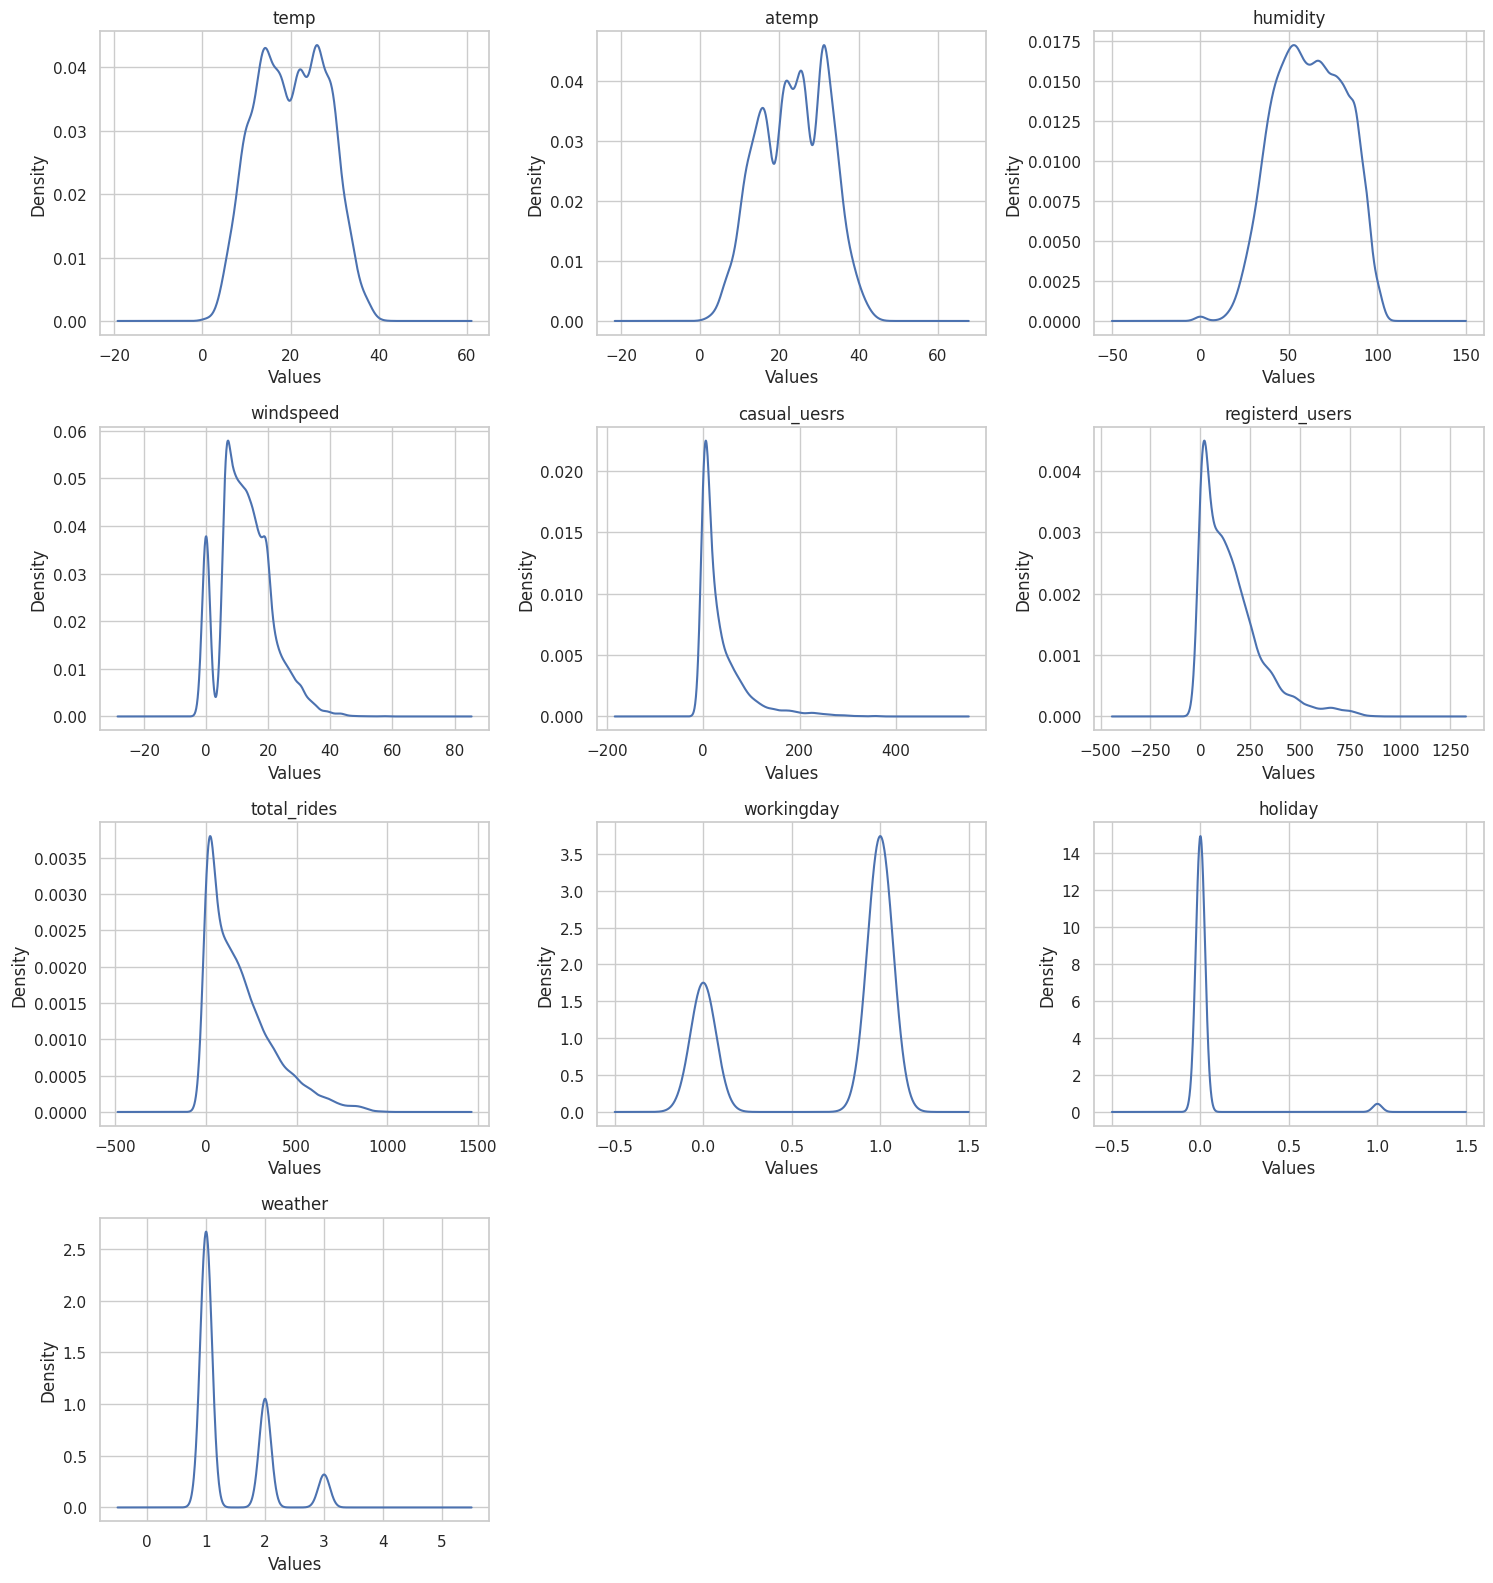

In [ ]:
n_cols = 3
n_rows = int(np.ceil(len(columns.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns.columns):
    columns[col].plot(kind='density', ax=axes[i], title=col)
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Density")
for j in range(len(columns.columns), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

###Shapiro-Wilk Test

In [ ]:
columns

,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides,workingday,holiday,weather
0,9.84,14.395,81,0.0000,3,13,16,0,0,1
1,9.02,13.635,80,0.0000,8,32,40,0,0,1
2,9.02,13.635,80,0.0000,5,27,32,0,0,1
3,9.84,14.395,75,0.0000,3,10,13,0,0,1
4,9.84,14.395,75,0.0000,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,7,329,336,1,0,1
10882,14.76,17.425,57,15.0013,10,231,241,1,0,1
10883,13.94,15.910,61,15.0013,4,164,168,1,0,1
10884,13.94,17.425,61,6.0032,12,117,129,1,0,1


In [ ]:
for column_name in columns:
    print()

    # Perform the Shapiro-Wilk normality test on the column data
    test_statistic, p_value = shapiro(columns[column_name])

    # Print the test statistic and p-value for each column
    print(f"The test-statistic for {column_name} is {test_statistic} with p-value {p_value}")

    # Check if the p-value is greater than 0.05 to conclude normality
    if p_value > 0.05:
        print(f"The distribution of {column_name} is normal")
    else:
        print(f"The distribution of {column_name} is not normal")


The test-statistic for temp is 0.9804052990118979 with p-value 4.4416921644612106e-36
The distribution of temp is not normal

The test-statistic for atemp is 0.9815304574471947 with p-value 3.220898326923054e-35
The distribution of atemp is not normal

The test-statistic for humidity is 0.982258701470504 with p-value 1.2220289155107286e-34
The distribution of humidity is not normal

The test-statistic for windspeed is 0.9587337923764818 with p-value 7.590114681771609e-48
The distribution of windspeed is not normal

The test-statistic for casual_uesrs is 0.7056347316275473 with p-value 3.5447963283866637e-87
The distribution of casual_uesrs is not normal

The test-statistic for registerd_users is 0.856277816161614 with p-value 1.9729674093766246e-71
The distribution of registerd_users is not normal

The test-statistic for total_rides is 0.8783658962690556 with p-value 5.369837893115507e-68
The distribution of total_rides is not normal

The test-statistic for workingday is 0.58721508740

2-Sample T-Test

In [ ]:
df_raw

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides,year,month,day,hour,day_of_week,season_type,weather_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,0,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,1,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,2,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,3,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,4,Saturday,Spring,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,19,Wednesday,Winter,Clear
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,20,Wednesday,Winter,Clear
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,21,Wednesday,Winter,Clear
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,22,Wednesday,Winter,Clear


###Chisquare test

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_raw['season'], df_raw['weather'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_val}")

# Decision based on p-value
if p_val < 0.05:
    print("Reject the null hypothesis: Weather and season are dependent.")
else:
    print("Fail to reject the null hypothesis: Weather and season are independent.")


Chi-Square Statistic: 49.158655596893624, P-value: 1.549925073686492e-07
Reject the null hypothesis: Weather and season are dependent.


##Shapiro & Levene Test

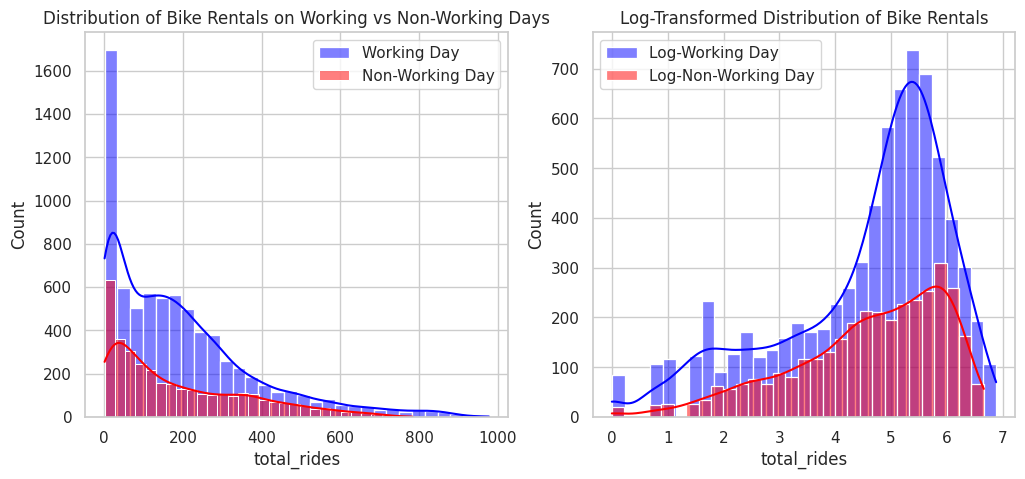

In [ ]:
# Separate data into two groups: working day and non-working day
working_day = df_raw[df_raw['workingday'] == 1]['total_rides']
non_working_day = df_raw[df_raw['workingday'] == 0]['total_rides']

# Apply log transformation
log_working_day = np.log(working_day)
log_non_working_day = np.log(non_working_day)

# 1. Histogram to check skewness
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
sns.histplot(working_day, kde=True, color="blue", label="Working Day", bins=30)
sns.histplot(non_working_day, kde=True, color="red", label="Non-Working Day", bins=30)
plt.legend()
plt.title("Distribution of Bike Rentals on Working vs Non-Working Days")

# Log-transformed Data
plt.subplot(1, 2, 2)
sns.histplot(log_working_day, kde=True, color="blue", label="Log-Working Day", bins=30)
sns.histplot(log_non_working_day, kde=True, color="red", label="Log-Non-Working Day", bins=30)
plt.legend()
plt.title("Log-Transformed Distribution of Bike Rentals")
plt.show()

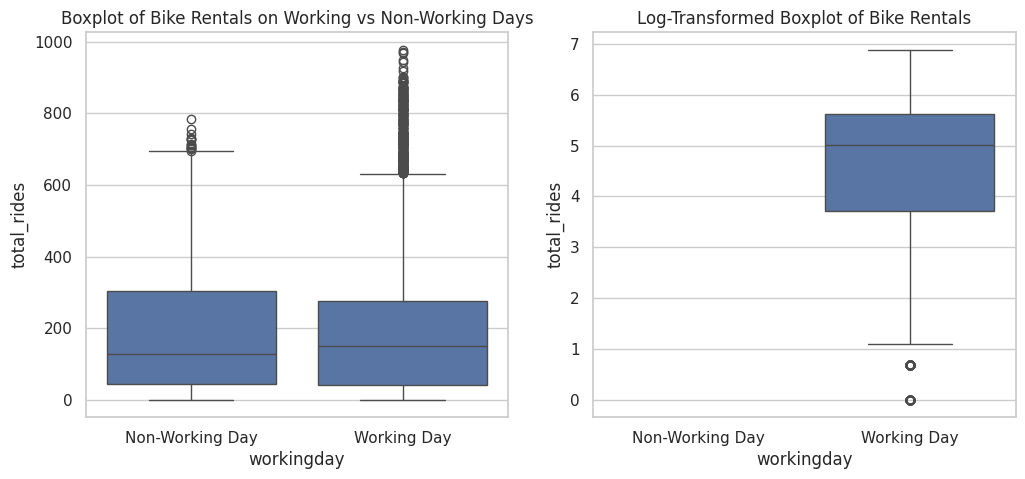

In [ ]:
# 2. Boxplot to check outliers
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
sns.boxplot(x=df_raw['workingday'], y=df_raw['total_rides'])
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.title("Boxplot of Bike Rentals on Working vs Non-Working Days")

# Log-transformed Data
plt.subplot(1, 2, 2)
sns.boxplot(x=df_raw['workingday'], y=log_working_day)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.title("Log-Transformed Boxplot of Bike Rentals")
plt.show()

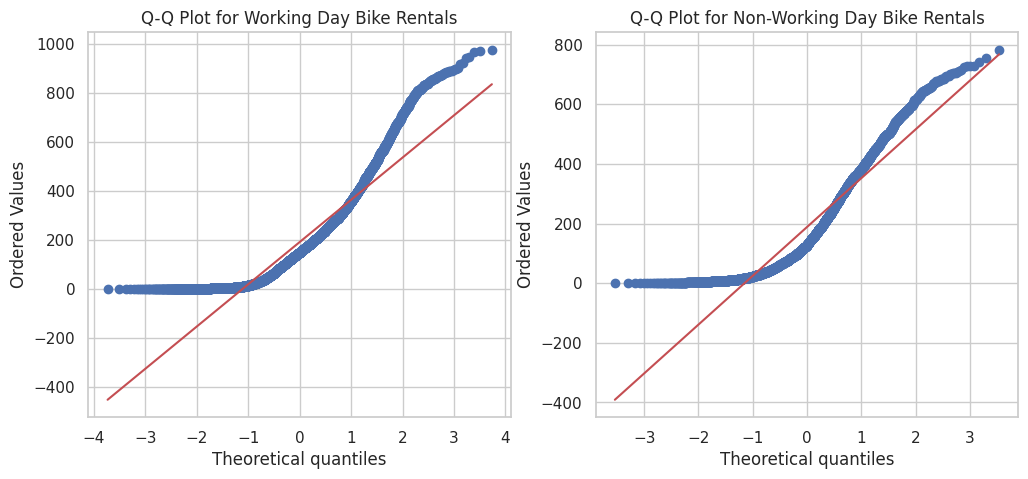

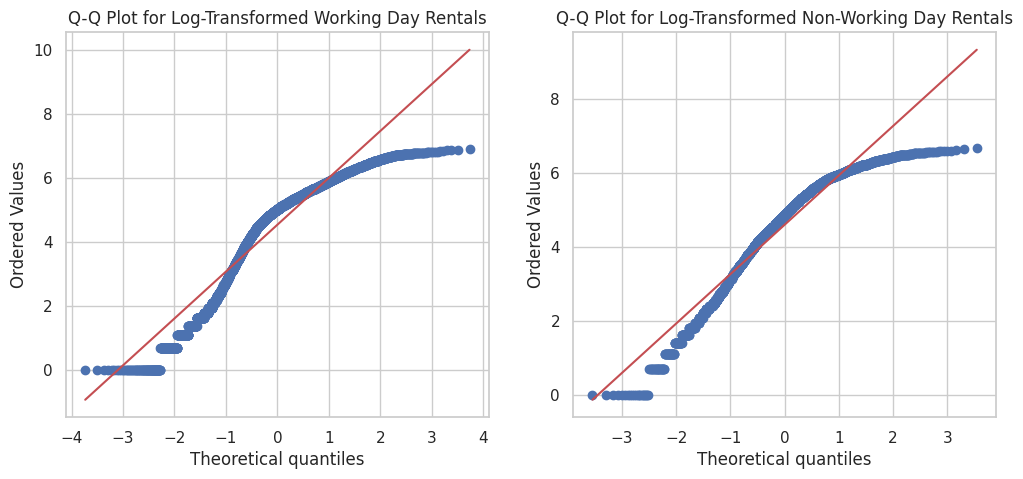

In [ ]:
import scipy.stats as stats
# 3. Q-Q Plot to check normality
plt.figure(figsize=(12, 5))

# Q-Q Plot for original data
plt.subplot(1, 2, 1)
stats.probplot(working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Working Day Bike Rentals")

plt.subplot(1, 2, 2)
stats.probplot(non_working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Non-Working Day Bike Rentals")
plt.show()

# Q-Q Plot for log-transformed data
plt.figure(figsize=(12, 5))

# Q-Q Plot for log-transformed data
plt.subplot(1, 2, 1)
stats.probplot(log_working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Log-Transformed Working Day Rentals")

plt.subplot(1, 2, 2)
stats.probplot(log_non_working_day, dist="norm", plot=plt)
plt.title("Q-Q Plot for Log-Transformed Non-Working Day Rentals")
plt.show()

In [ ]:
# 4. Check skewness numerically for both original and log-transformed data
skew_working = stats.skew(working_day)
skew_non_working = stats.skew(non_working_day)

skew_log_working = stats.skew(log_working_day)
skew_log_non_working = stats.skew(log_non_working_day)

print(f"Skewness of Working Day Rentals (Original): {skew_working}")
print(f"Skewness of Non-Working Day Rentals (Original): {skew_non_working}")
print(f"Skewness of Working Day Rentals (Log-Transformed): {skew_log_working}")
print(f"Skewness of Non-Working Day Rentals (Log-Transformed): {skew_log_non_working}")

Skewness of Working Day Rentals (Original): 1.3464498800708273
Skewness of Non-Working Day Rentals (Original): 0.963621480100446
Skewness of Working Day Rentals (Log-Transformed): -0.997898828621721
Skewness of Non-Working Day Rentals (Log-Transformed): -0.8606344088721859


In [ ]:
# 5. Perform Shapiro-Wilk Test for normality
shapiro_working = stats.shapiro(working_day)
shapiro_non_working = stats.shapiro(non_working_day)

shapiro_log_working = stats.shapiro(log_working_day)
shapiro_log_non_working = stats.shapiro(log_non_working_day)

print(f"Shapiro-Wilk Test for Working Day (Original): p-value = {shapiro_working.pvalue}")
print(f"Shapiro-Wilk Test for Non-Working Day (Original): p-value = {shapiro_non_working.pvalue}")
print(f"Shapiro-Wilk Test for Log-Transformed Working Day: p-value = {shapiro_log_working.pvalue}")
print(f"Shapiro-Wilk Test for Log-Transformed Non-Working Day: p-value = {shapiro_log_non_working.pvalue}")

# Interpretation
alpha = 0.05
if shapiro_working.pvalue < alpha:
    print("The working day rentals are NOT normally distributed (Original).")
else:
    print("The working day rentals are normally distributed (Original).")

if shapiro_non_working.pvalue < alpha:
    print("The non-working day rentals are NOT normally distributed (Original).")
else:
    print("The non-working day rentals are normally distributed (Original).")

if shapiro_log_working.pvalue < alpha:
    print("The log-transformed working day rentals are NOT normally distributed.")
else:
    print("The log-transformed working day rentals are normally distributed.")

if shapiro_log_non_working.pvalue < alpha:
    print("The log-transformed non-working day rentals are NOT normally distributed.")
else:
    print("The log-transformed non-working day rentals are normally distributed.")

Shapiro-Wilk Test for Working Day (Original): p-value = 2.2521124830019574e-61
Shapiro-Wilk Test for Non-Working Day (Original): p-value = 4.4728547627911074e-45
Shapiro-Wilk Test for Log-Transformed Working Day: p-value = 1.3876984374347798e-55
Shapiro-Wilk Test for Log-Transformed Non-Working Day: p-value = 9.752105323817043e-37
The working day rentals are NOT normally distributed (Original).
The non-working day rentals are NOT normally distributed (Original).
The log-transformed working day rentals are NOT normally distributed.
The log-transformed non-working day rentals are NOT normally distributed.


##Mann-Whitney U Test.

In [ ]:
u_stat, p_value = stats.mannwhitneyu(working_day, non_working_day, alternative="two-sided")
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("There is a significant difference in bike rentals between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.")


Mann-Whitney U Test: U-statistic = 12868495.5, p-value = 0.9679139953914079
Fail to reject the null hypothesis: There is no significant difference in bike rentals between working and non-working days.


### ANNOVA

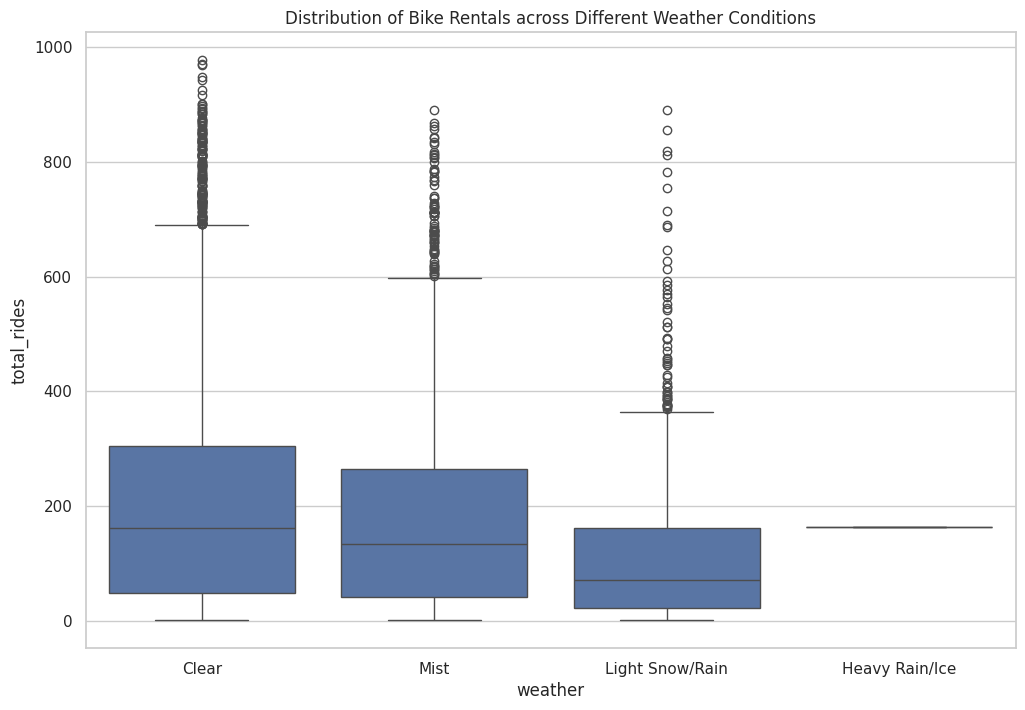

In [ ]:
# Visualize the distribution of total_rides across different weather conditions
plt.figure(figsize=(12, 8))
sns.boxplot(x='weather', y='total_rides', data=df_raw)
plt.title('Distribution of Bike Rentals across Different Weather Conditions')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Ice'])
plt.show()

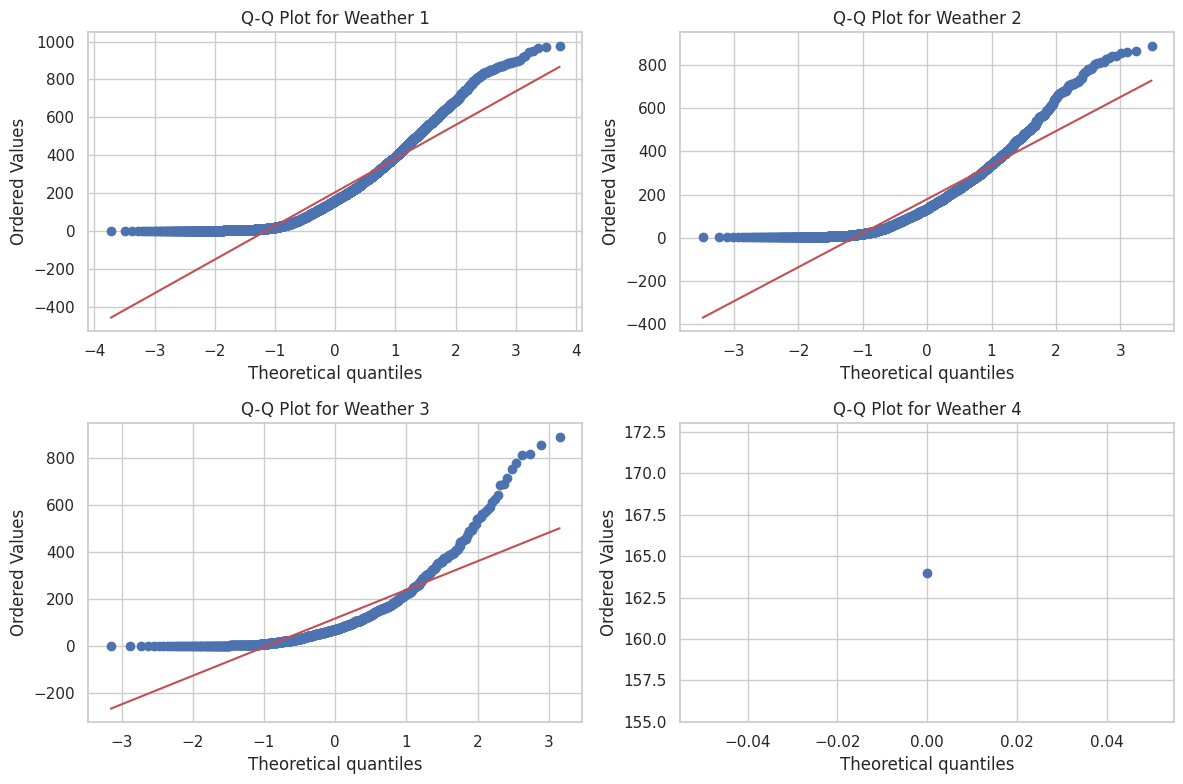

Levene's Test p-value: 3.504937946833238e-35
The variances across weather conditions are significantly different.
ANOVA Test p-value: 5.482069475935669e-42
There is a significant difference in the number of cycles rented across different weather conditions.


In [ ]:
weather_conditions = df_raw['weather'].unique()

# Creating a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flattening axes array to iterate over
axes = axes.flatten()

# Loop over weather conditions and plot Q-Q plot
for i, weather_condition in enumerate(weather_conditions):
    data_weather = df_raw[df_raw['weather'] == weather_condition]['total_rides']

    # Q-Q Plot
    stats.probplot(data_weather, dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot for Weather {weather_condition}")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Levene's Test for Equal Variance across weather conditions
levene_stat, levene_p = stats.levene(
    df_raw[df_raw['weather'] == 1]['total_rides'],  # Clear
    df_raw[df_raw['weather'] == 2]['total_rides'],  # Mist
    df_raw[df_raw['weather'] == 3]['total_rides'],  # Light Snow/Rain
    df_raw[df_raw['weather'] == 4]['total_rides']   # Heavy Rain/Ice
)
print(f"Levene's Test p-value: {levene_p}")

alpha = 0.05
if levene_p < alpha:
    print("The variances across weather conditions are significantly different.")
else:
    print("The variances across weather conditions are not significantly different.")

# One-way ANOVA to check if total_rides differ across weather conditions
anova_stat, anova_p = stats.f_oneway(
    df_raw[df_raw['weather'] == 1]['total_rides'],  # Clear
    df_raw[df_raw['weather'] == 2]['total_rides'],  # Mist
    df_raw[df_raw['weather'] == 3]['total_rides'],  # Light Snow/Rain
    df_raw[df_raw['weather'] == 4]['total_rides']   # Heavy Rain/Ice
)
print(f"ANOVA Test p-value: {anova_p}")
if anova_p < alpha:
    print("There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("There is no significant difference in the number of cycles rented across different weather conditions.")

As you can ee that assumptions are not met for ANNOVA so I'll go ahead with Kruskal-Wallis test

In [ ]:
# Kruskal-Wallis Test to check if total_rides differ across weather conditions
kruskal_stat, kruskal_p = stats.kruskal(
    df_raw[df_raw['weather'] == 1]['total_rides'],  # Clear
    df_raw[df_raw['weather'] == 2]['total_rides'],  # Mist
    df_raw[df_raw['weather'] == 3]['total_rides'],  # Light Snow/Rain
    df_raw[df_raw['weather'] == 4]['total_rides']   # Heavy Rain/Ice
)

# Display Kruskal-Wallis result
print(f"Kruskal-Wallis Test p-value: {kruskal_p}")

# Interpretation based on Kruskal-Wallis Test p-value
if kruskal_p < alpha:
    print("There is a significant difference in the number of cycles rented across different weather conditions.")
else:
    print("There is no significant difference in the number of cycles rented across different weather conditions.")


Kruskal-Wallis Test p-value: 3.501611300708679e-44
There is a significant difference in the number of cycles rented across different weather conditions.


### Chi-Square Test of Independence

In [ ]:
import scipy.stats as stats

# Create a contingency table for 'weather' and 'season'
contingency_table = pd.crosstab(df_raw['weather_type'], df_raw['season_type'], margins=True)

print("\nContingency Table")
print(contingency_table.to_string(index=True, header=True, justify='center'))

# Check for missing values in the contingency table
if contingency_table.isnull().values.any():
    print("\nWarning: The contingency table contains missing values, which might affect the Chi-Square test.")
else:
    print("\nNo missing values in the contingency table.")

# Perform the Chi-Square Test of Independence
# Exclude the 'All' row/column (margins) for the test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1, :-1])

# Output the results with rounded values for better readability
print(f"\nChi-Square Test Results:")
print(f"{'Chi-Square Statistic':<25}: {chi2_stat:.4f}")
print(f"{'Degrees of Freedom':<25}: {dof}")
print(f"{'P-Value':<25}: {p_value:.4f}")

print(f"\n{'Expected Frequencies':<20}")
expected_df = pd.DataFrame(expected, columns=contingency_table.columns[:-1], index=contingency_table.index[:-1])
print(expected_df.to_string(index=True, header=True, justify='center'))

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: There is a significant relationship between 'Weather' and 'Season' (Reject H0).")
else:
    print("\nConclusion: 'Weather' and 'Season' are independent (Fail to reject H0).")

# Check if the expected frequency is too low (less than 5) in any cell, which can affect the validity of the test
if (expected < 5).any():
    print("\nWarning: Some expected frequencies are less than 5, which may affect the reliability of the Chi-Square test.")



Contingency Table
season_type   Fall  Spring  Summer  Winter   All 
weather_type                                     
Clear         1930   1759    1801    1702    7192
Heavy Rain       0      1       0       0       1
Light Snow     199    211     224     225     859
Mist           604    715     708     807    2834
All           2733   2686    2733    2734   10886

No missing values in the contingency table.

Chi-Square Test Results:
Chi-Square Statistic     : 49.1587
Degrees of Freedom       : 9
P-Value                  : 0.0000

Expected Frequencies
season_type      Fall        Spring       Summer       Winter   
weather_type                                                    
Clear         1805.597648  1774.546390  1805.597648  1806.258313
Heavy Rain       0.251056     0.246739     0.251056     0.251148
Light Snow     215.657450   211.948742   215.657450   215.736359
Mist           711.493845   699.258130   711.493845   711.754180

Conclusion: There is a significant relationship b

## Time Series Analysis.

In [ ]:
df_raw.set_index('datetime', inplace=True)  # Set 'datetime' as the index
df_raw.drop(['day_of_week', 'month', 'year', 'day', 'hour', 'season_type', 'weather_type'], axis=1, inplace=True)  # Drop unnecessary columns
df_raw.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual_uesrs,registerd_users,total_rides
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


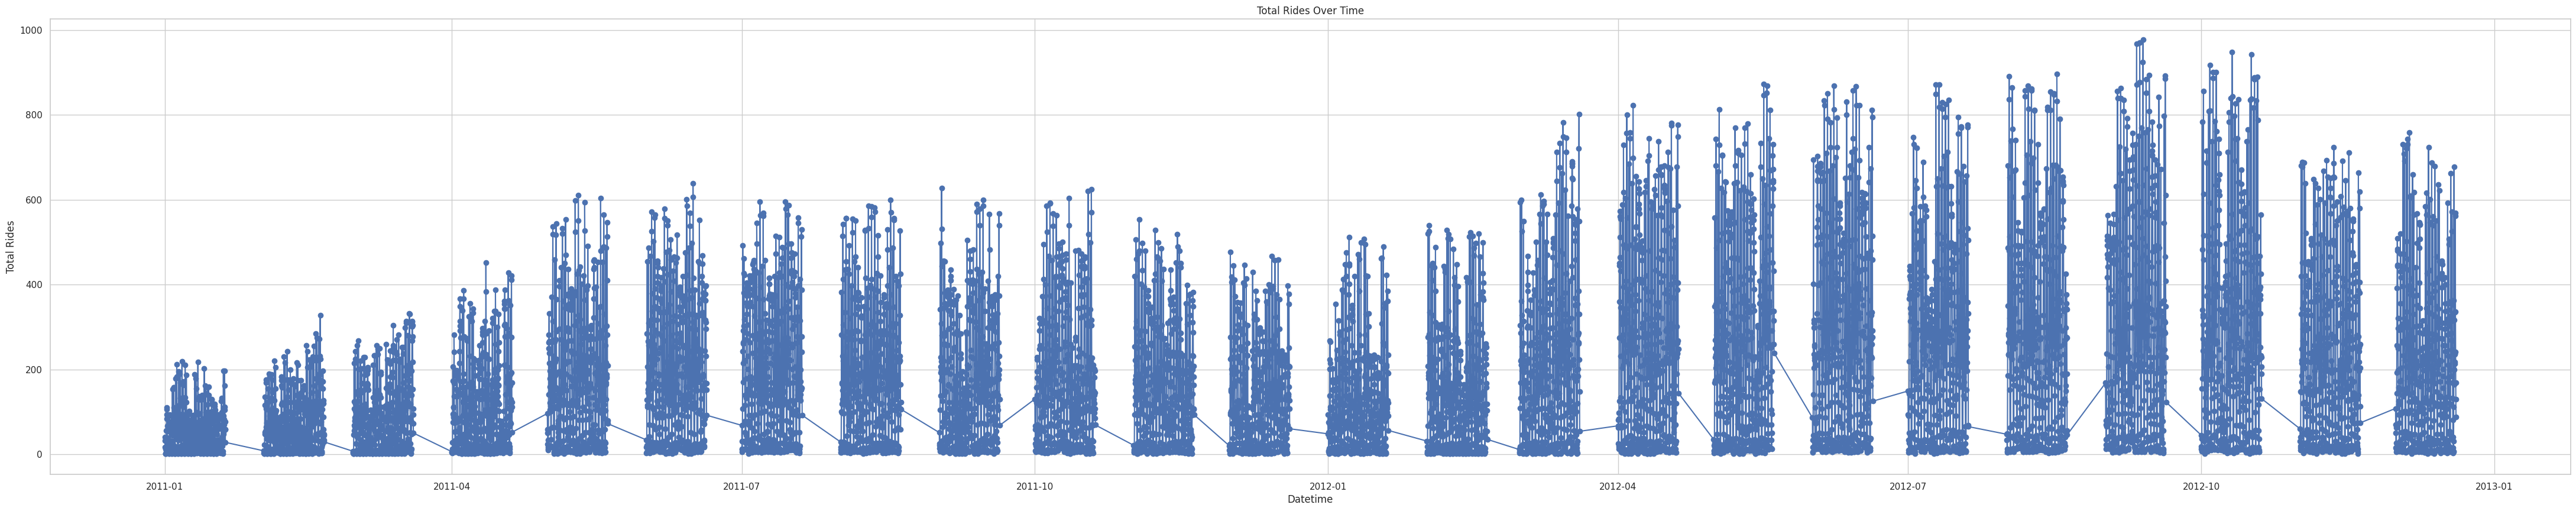

In [ ]:
# Plot the total rides to visualize the time series
plt.figure(figsize=(55, 10))
plt.plot(df_raw.index, df_raw['total_rides'], marker='o', linestyle='-')
plt.title('Total Rides Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Rides')
plt.grid(True)
plt.show()

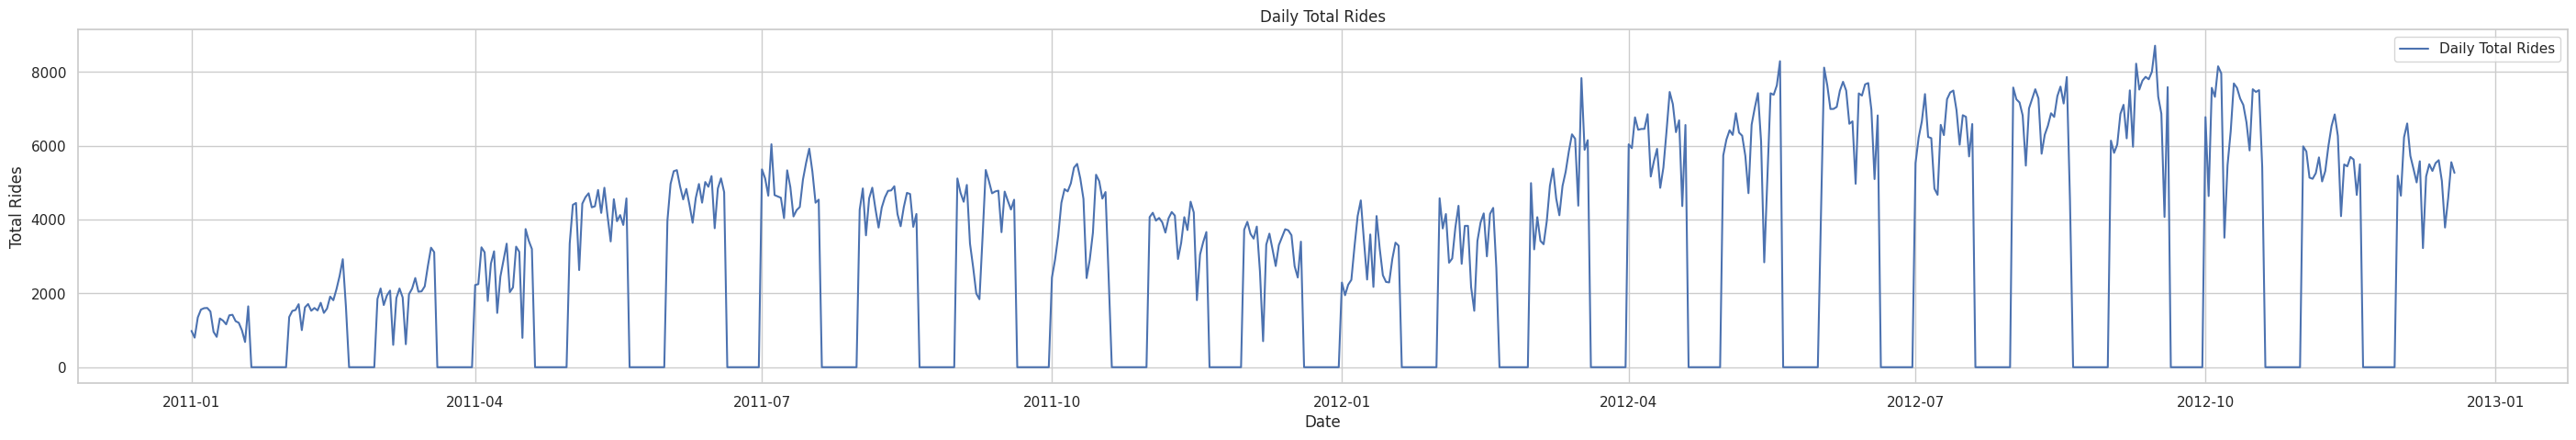

In [ ]:
df_daily = df_raw['total_rides'].resample('D').sum()
# Plot daily data
plt.figure(figsize=(35, 5))
plt.plot(df_daily, label='Daily Total Rides')
plt.title('Daily Total Rides')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.grid(True)
plt.legend()
plt.show()

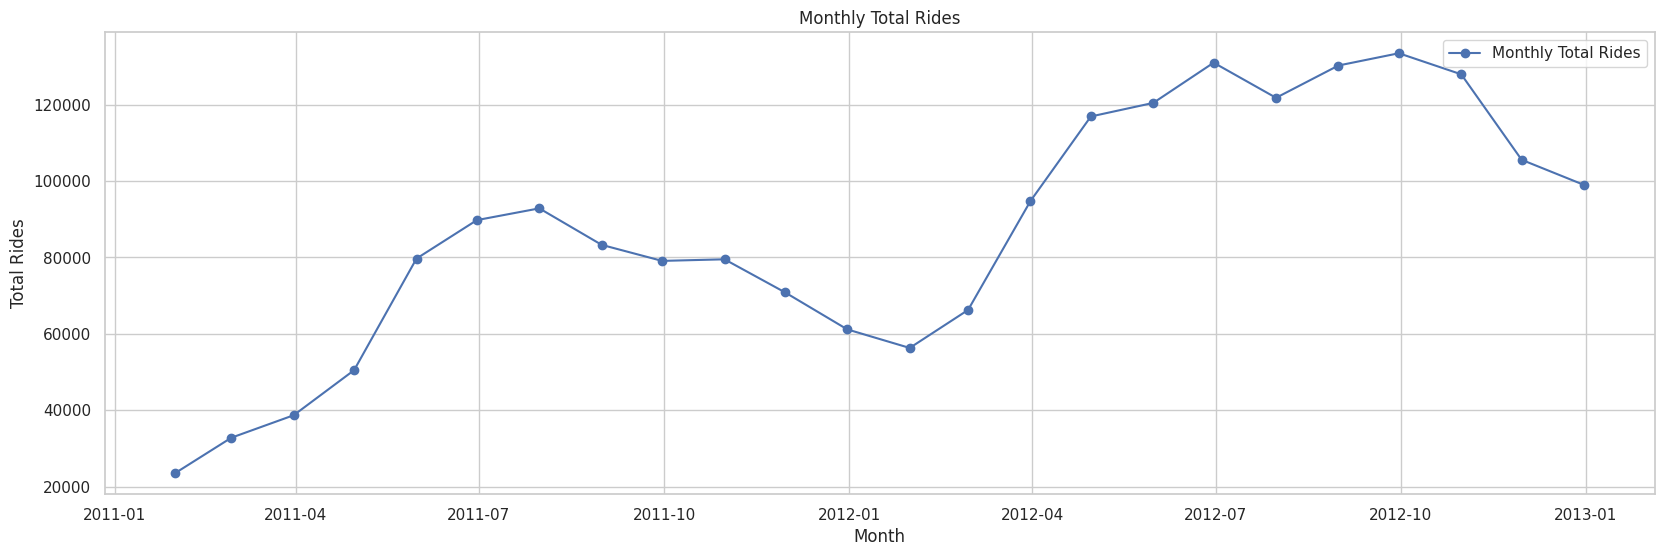

In [ ]:
# Aggregate to monthly data
df_monthly = df_raw['total_rides'].resample('M').sum()
# Plot monthly data
plt.figure(figsize=(20, 6))
plt.plot(df_monthly, marker='o', label='Monthly Total Rides')
plt.title('Monthly Total Rides')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.grid(True)
plt.legend()
plt.show()

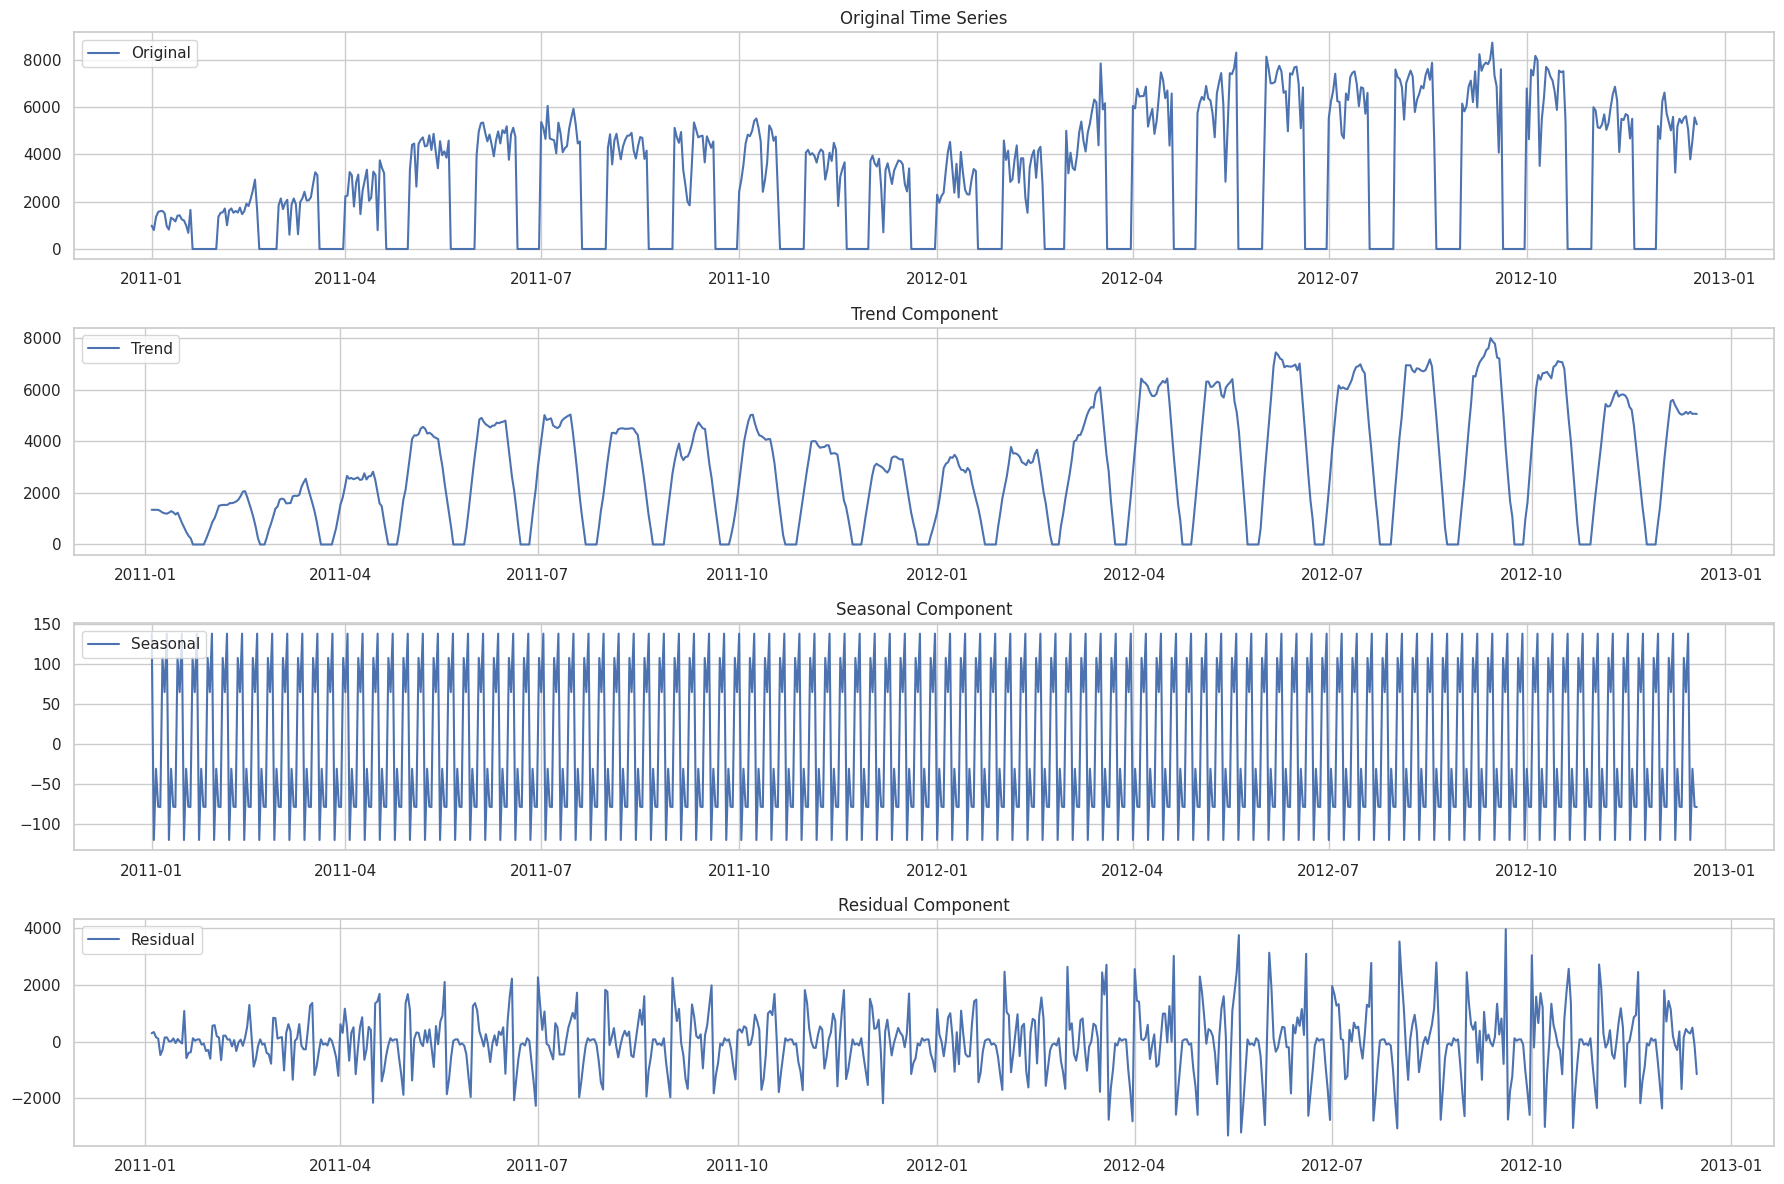

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Resample to daily data and fill missing values
df_daily = df_raw['total_rides'].resample('D').sum().interpolate(method='time')

# Decompose the data (weekly seasonality)
decompose_result = seasonal_decompose(df_daily, model='additive', period=7)

# Custom plot with larger size
plt.figure(figsize=(18, 12))

# Plot each component separately
plt.subplot(4, 1, 1)
plt.plot(df_daily, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decompose_result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decompose_result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decompose_result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the original data
adf_test = adfuller(df_raw['total_rides'])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

# If p-value > 0.05, the data is non-stationary. Apply differencing:
df_raw['total_rides_diff'] = df_raw['total_rides'].diff()

# Re-run the ADF test on the differenced data
adf_test_diff = adfuller(df_raw['total_rides_diff'].dropna())
print("ADF Statistic (Differenced):", adf_test_diff[0])
print("p-value (Differenced):", adf_test_diff[1])


ADF Statistic: -6.419975656501509
p-value: 1.80161952866896e-08
ADF Statistic (Differenced): -23.300534023635578
p-value (Differenced): 0.0


Since the original data is stationary, we can directly build the SARIMA model on the total_rides series without differencing (d=0).

Example SARIMA order: (p=1, d=0, q=1) with a seasonal component (P=1, D=0, Q=1) and a seasonal period of 24 (for hourly data).

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model on the original data
sarima_model = SARIMAX(df_raw['total_rides'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
sarima_fit = sarima_model.fit(disp=False)

# Print model summary
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        total_rides   No. Observations:                10886
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -60722.849
Date:                            Wed, 05 Feb 2025   AIC                         121455.698
Time:                                    04:15:24   BIC                         121492.175
Sample:                                         0   HQIC                        121467.993
                                          - 10886                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5648      0.007     85.421      0.000       0.552       0.578
ma.L1          0.4601      0.009   

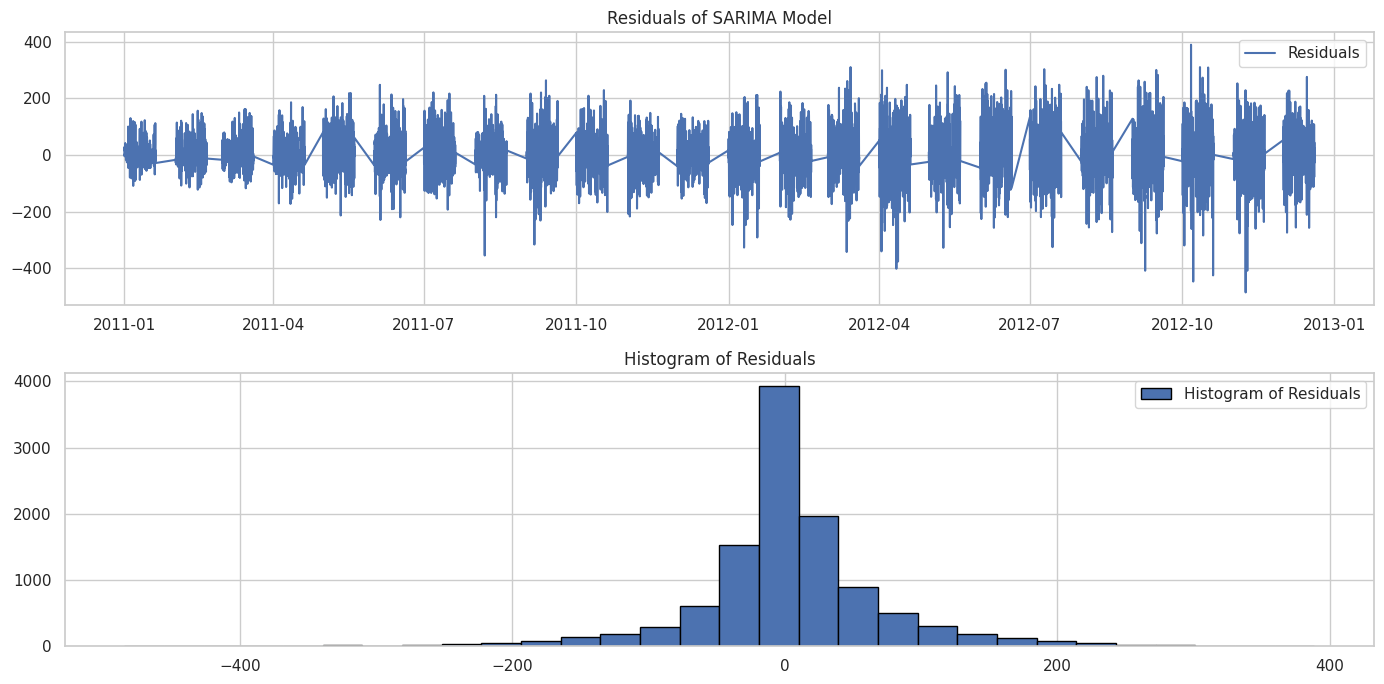

In [ ]:
# Plot the residuals
residuals = sarima_fit.resid

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(residuals, label='Residuals')
plt.title('Residuals of SARIMA Model')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(residuals, bins=30, edgecolor='black', label='Histogram of Residuals')
plt.title('Histogram of Residuals')
plt.legend()

plt.tight_layout()
plt.show()


## Model Evalution

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE on the fitted values
rmse = np.sqrt(mean_squared_error(df_raw['total_rides'], sarima_fit.fittedvalues))
print(f"RMSE: {rmse:.2f}")

RMSE: 63.90


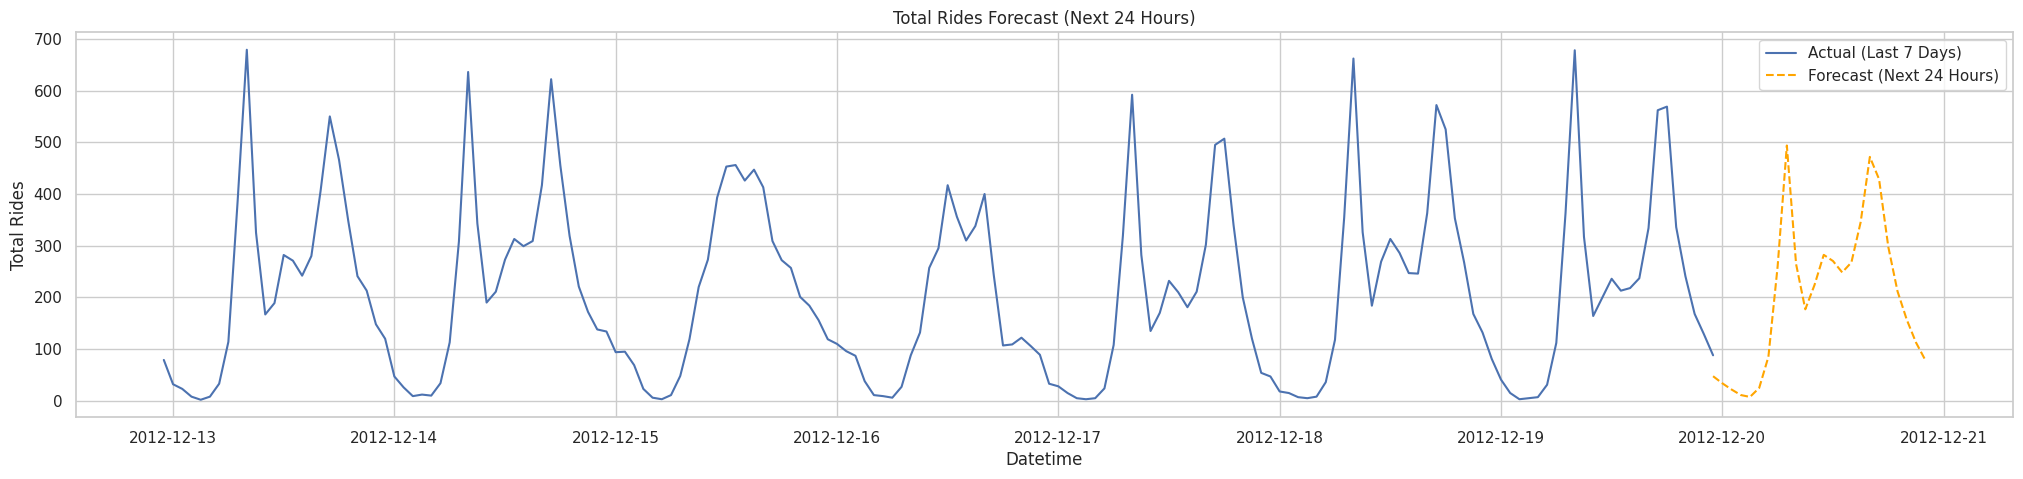

In [ ]:
# Subset the data to the last 7 days
recent_data = df_raw[df_raw.index >= (df_raw.index[-1] - pd.Timedelta(days=7))]

# Forecast for the next 24 periods
forecast = sarima_fit.forecast(steps=24)

# Plot the subsetted actual data and forecast
plt.figure(figsize=(25, 5))
plt.plot(recent_data.index, recent_data['total_rides'], label='Actual (Last 7 Days)')
plt.plot(pd.date_range(recent_data.index[-1], periods=24, freq='H'), forecast, linestyle='--', color='orange', label='Forecast (Next 24 Hours)')
plt.title('Total Rides Forecast (Next 24 Hours)')
plt.xlabel('Datetime')
plt.ylabel('Total Rides')
plt.legend()
plt.grid(True)
plt.show()